# Downloading the Data (DON'T EXECUTE THIS CODE UNLESS YOU REALLY NEED THE DATA!)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

/Users/laurinlotscher/.pyenv/versions/3.11.11/envs/dspro1-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.04G/2.04G [01:19<00:00, 27.6MB/s]

Extracting files...


Path to dataset files: /Users/laurinlotscher/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3


In [7]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

### Import Data into this a data directory on the same level as notebooks

In [39]:
data_dir = Path("/Users/laurinlotscher/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color")

In [41]:
counts = {
    cls.name: len(list(cls.glob("*.jpg"))) + len(list(cls.glob("*.JPG")))
    for cls in data_dir.iterdir() if cls.is_dir()
}
df = pd.DataFrame(list(counts.items()), columns=["class", "n_images"]).sort_values("n_images", ascending=False)
df.head()

,class,n_images
11,Orange___Haunglongbing_(Citrus_greening),5507
24,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357
37,Soybean___healthy,5090
28,Peach___Bacterial_spot,2297
16,Tomato___Bacterial_spot,2127


# Plot classes and count

/var/folders/wp/23z8rxg11fv4hsbvp2xvm3fc0000gn/T/ipykernel_15769/3620698213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="class", x="n_images", data=df, palette="viridis")


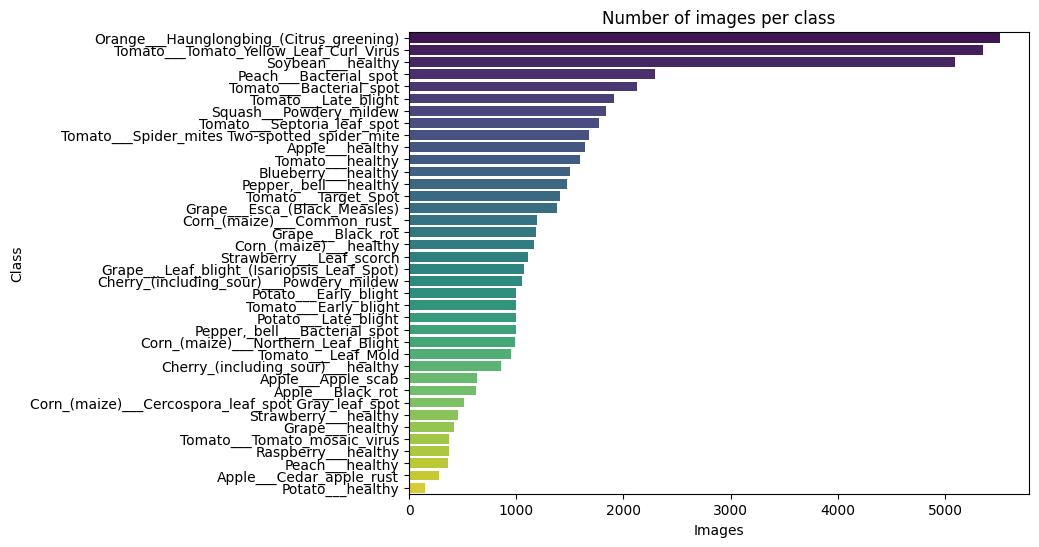

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(y="class", x="n_images", data=df, palette="viridis")
plt.title("Number of images per class")
plt.xlabel("Images")
plt.ylabel("Class")
plt.show()

# Different Plants and diseases

In [24]:
df["plant"] = df["class"].apply(lambda x: x.split("___")[0])
df["condition"] = df["class"].apply(lambda x: x.split("___")[1] if "___" in x else "unknown")

df.head()

,class,n_images,healthy,status,plant,condition
11,Orange___Haunglongbing_(Citrus_greening),5507,sick,sick,Orange,Haunglongbing_(Citrus_greening)
24,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357,sick,sick,Tomato,Tomato_Yellow_Leaf_Curl_Virus
37,Soybean___healthy,5090,healthy,healthy,Soybean,healthy
28,Peach___Bacterial_spot,2297,sick,sick,Peach,Bacterial_spot
16,Tomato___Bacterial_spot,2127,sick,sick,Tomato,Bacterial_spot


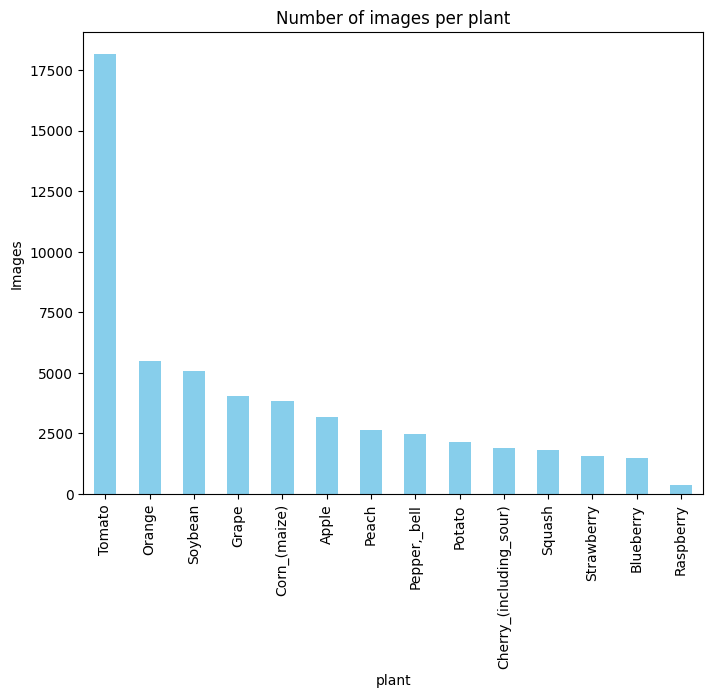

In [25]:
plant_counts = df.groupby("plant")["n_images"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
plant_counts.plot(kind="bar", color="skyblue")
plt.title("Number of images per plant")
plt.ylabel("Images")
plt.show()

In [26]:
plant_condition_counts = df.groupby(["plant", "condition"])["n_images"].sum().reset_index()

plant_condition_counts.head(10)

,plant,condition,n_images
0,Apple,Apple_scab,630
1,Apple,Black_rot,621
2,Apple,Cedar_apple_rust,275
3,Apple,healthy,1645
4,Blueberry,healthy,1502
5,Cherry_(including_sour),Powdery_mildew,1052
6,Cherry_(including_sour),healthy,854
7,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,513
8,Corn_(maize),Common_rust_,1192
9,Corn_(maize),Northern_Leaf_Blight,985


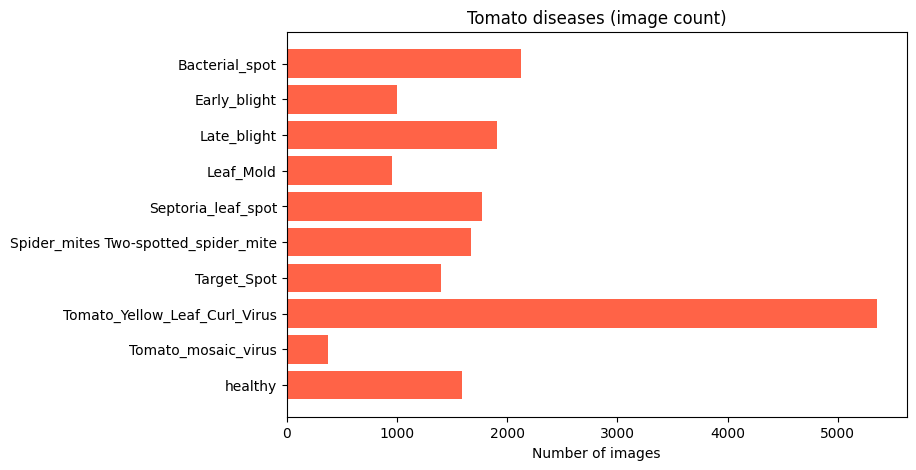

In [27]:
tomato = plant_condition_counts[plant_condition_counts["plant"]=="Tomato"]

plt.figure(figsize=(8,5))
plt.barh(tomato["condition"], tomato["n_images"], color="tomato")
plt.title("Tomato diseases (image count)")
plt.xlabel("Number of images")
plt.gca().invert_yaxis()
plt.show()

# Healthy vs Sick 

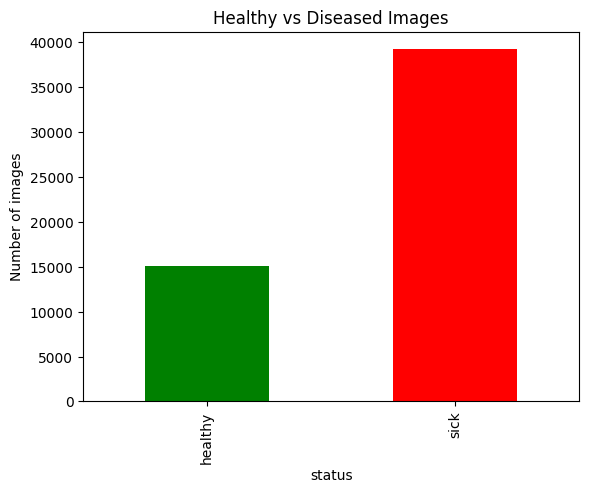

In [22]:
df['status'] = df['class'].apply(lambda x: 'healthy' if 'healthy' in x else 'sick')
status_counts = df.groupby("status")["n_images"].sum()

status_counts.plot(kind="bar", color=["green","red"])
plt.title("Healthy vs Diseased Images")
plt.ylabel("Number of images")
plt.show()

# Class per plant

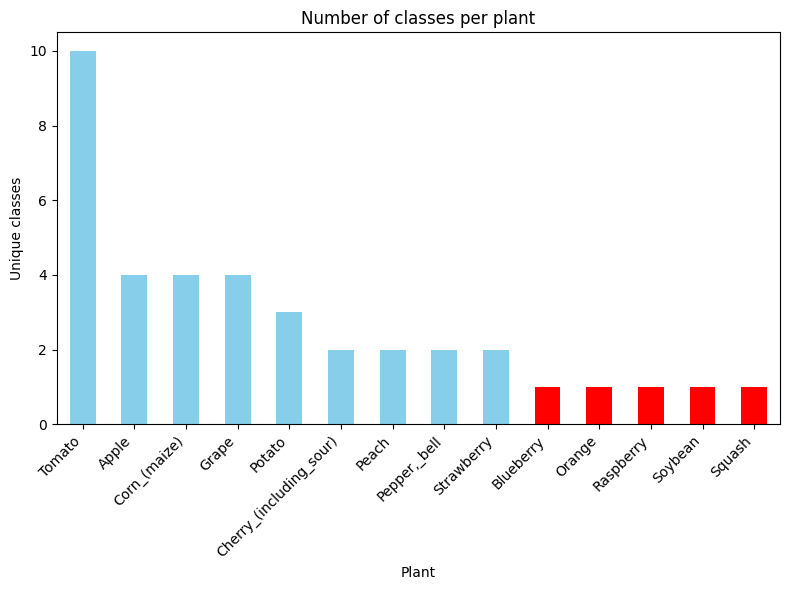

In [30]:
class_counts = (
    df.groupby("plant")["class"]
      .nunique()
      .sort_values(ascending=False)
)

colors = ["red" if n == 1 else "skyblue" for n in class_counts.values]

plt.figure(figsize=(8,6))
class_counts.plot(kind="bar", color=colors)
plt.title("Number of classes per plant")
plt.ylabel("Unique classes")
plt.xlabel("Plant")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Classes and Images count correlation

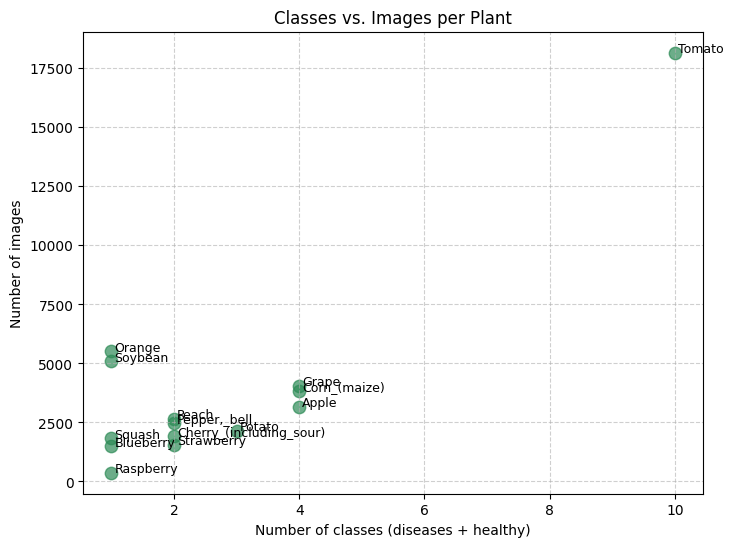

In [31]:
# aggregate per plant
per_plant = (
    df.groupby("plant")
      .agg(classes=("class", "nunique"), images=("n_images", "sum"))
      .reset_index()
)

plt.figure(figsize=(8,6))
plt.scatter(per_plant["classes"], per_plant["images"], s=80, color="seagreen", alpha=0.7)

# add labels for each plant
for _, row in per_plant.iterrows():
    plt.text(row["classes"]+0.05, row["images"], row["plant"], fontsize=9)

plt.xlabel("Number of classes (diseases + healthy)")
plt.ylabel("Number of images")
plt.title("Classes vs. Images per Plant")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Data density per class

In [32]:
# aggregate by plant
per_plant = (
    df.groupby("plant")
      .agg(classes=("class", "nunique"), images=("n_images", "sum"))
      .reset_index()
)

# calculate images per class (density)
per_plant["density"] = per_plant["images"] / per_plant["classes"]

# sort by density
per_plant_sorted = per_plant.sort_values("density", ascending=False)
per_plant_sorted.head(10)

,plant,classes,images,density
5,Orange,1,5507,5507.0
10,Soybean,1,5090,5090.0
11,Squash,1,1835,1835.0
13,Tomato,10,18159,1815.9
1,Blueberry,1,1502,1502.0
6,Peach,2,2657,1328.5
7,"Pepper,_bell",2,2474,1237.0
4,Grape,4,4062,1015.5
3,Corn_(maize),4,3852,963.0
2,Cherry_(including_sour),2,1906,953.0


/var/folders/wp/23z8rxg11fv4hsbvp2xvm3fc0000gn/T/ipykernel_15769/2337763595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="plant", x="density", data=per_plant_sorted, palette="viridis")


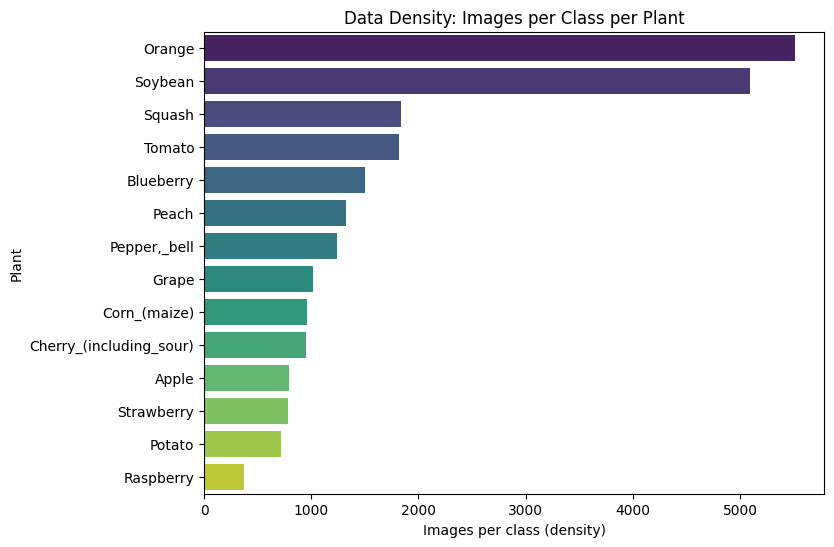

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(y="plant", x="density", data=per_plant_sorted, palette="viridis")
plt.title("Data Density: Images per Class per Plant")
plt.xlabel("Images per class (density)")
plt.ylabel("Plant")
plt.show()

# Image size stats

In [23]:
sizes = []
for cls in data_dir.iterdir():
    for img_path in cls.glob("*.jpg"):
        with Image.open(img_path) as img:
            sizes.append(img.size)

sizes_df = pd.DataFrame(sizes, columns=["width","height"])
print(sizes_df.describe())

        width  height
count  1500.0  1500.0
mean    256.0   256.0
std       0.0     0.0
min     256.0   256.0
25%     256.0   256.0
50%     256.0   256.0
75%     256.0   256.0
max     256.0   256.0
